<a href="https://colab.research.google.com/github/vaseem-20/Artificial-Intelligence/blob/main/Outlier_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Outlier handling
# data is normally distributed or not

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
array = np.random.randn(20)
array

array([ 0.2980394 ,  0.74269933,  0.15358702,  0.62244984,  1.76077129,
       -0.15606424, -1.06380421,  0.29455094,  0.89154635,  2.02599279,
        0.59740606,  0.74352449,  1.49665781,  1.62715313,  0.67517177,
       -0.57596361,  0.13318476,  1.83867015,  0.65842849, -0.37360693])

<Axes: ylabel='Density'>

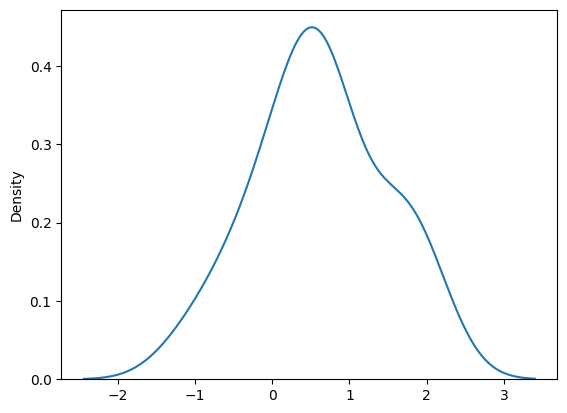

In [ ]:
sns.kdeplot(array)

<Axes: ylabel='Density'>

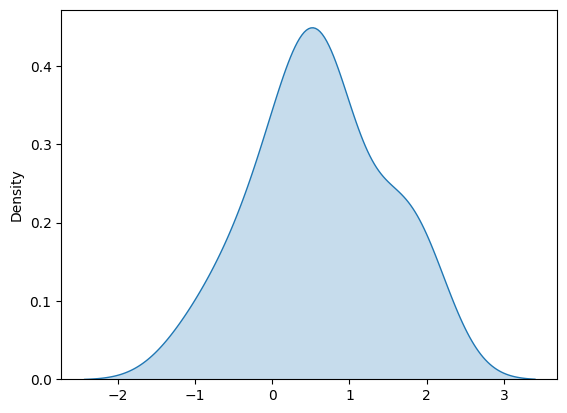

In [ ]:
sns.kdeplot(array,fill=True)

In [ ]:
# desiding data points are normally distributed or not
# by using shaprio test

In [ ]:
from scipy.stats import shapiro

In [ ]:
a,p_val =shapiro(array)
a,p_val

(np.float64(0.9653344806738375), np.float64(0.6549049989620975))

In [ ]:
if p_val>0.05:
  print("data is normallu distributed",p_val)
else:
    print("data is not normally distributed")


data is normallu distributed 0.6549049989620975


In [ ]:
# outliners handing methods
# standardisation -z score method
# iqr (inter quantile range)

In [ ]:
array1 = np.random.randint(10,30,20)
array1

array([13, 13, 24, 13, 26, 23, 27, 24, 16, 21, 21, 25, 26, 14, 20, 11, 20,
       17, 23, 20])

In [ ]:
array2 = np.array([10,30,20,27,28,210,25,17,13,28,16,30,26,220,16,23,180,13,14,27])
array2

array([ 10,  30,  20,  27,  28, 210,  25,  17,  13,  28,  16,  30,  26,
       220,  16,  23, 180,  13,  14,  27])

In [ ]:
len(array2)

20

In [ ]:
mean =np.mean(array1)
mean

np.float64(19.85)

In [ ]:
std = np.std(array1)
std

np.float64(4.932291556670186)

In [ ]:
for x_val in array1:
  z_score = (x_val-mean)/std
  z_score = np.abs(z_score)
  print(f"z_score of {x_val} is {z_score}")

z_score of 13 is 1.3888067891559253
z_score of 13 is 1.3888067891559253
z_score of 24 is 0.8413938941601586
z_score of 13 is 1.3888067891559253
z_score of 26 is 1.2468849274903557
z_score of 23 is 0.6386483774950601
z_score of 27 is 1.4496304441554544
z_score of 24 is 0.8413938941601586
z_score of 16 is 0.7805702391606297
z_score of 21 is 0.23315734416486306
z_score of 21 is 0.23315734416486306
z_score of 25 is 1.0441394108252573
z_score of 26 is 1.2468849274903557
z_score of 14 is 1.1860612724908268
z_score of 20 is 0.030411827499764493
z_score of 11 is 1.7942978224861224
z_score of 20 is 0.030411827499764493
z_score of 17 is 0.5778247224955312
z_score of 23 is 0.6386483774950601
z_score of 20 is 0.030411827499764493


In [ ]:
threshold =3

In [ ]:
outlier_list =[]
for x_val in array1:
  z_score = (x_val-mean)/std
  z_score = np.abs(z_score)

  if z_score>threshold:
    outlier_list.append(x_val)
print('outliers are :',outlier_list)

outliers are : []


In [ ]:
array2

array([ 10,  30,  20,  27,  28, 210,  25,  17,  13,  28,  16,  30,  26,
       220,  16,  23, 180,  13,  14,  27])

In [ ]:
mean2 = np.mean(array2)
mean2

np.float64(48.65)

In [ ]:
std2 = np.std(array2)
std2

np.float64(65.59517893869945)

In [ ]:
outlier_list =[]
for x_val in array2:
  z_score = (x_val-mean)/std
  z_score = np.abs(z_score)

  if z_score>threshold:
    outlier_list.append(x_val)
print('outliers are :',outlier_list)

outliers are : [np.int64(210), np.int64(220), np.int64(180)]


In [ ]:
threshold =2

In [ ]:
outlier_list =[]
for x_val in array2:
  z_score = (x_val-mean)/std
  z_score = np.abs(z_score)

  if z_score>threshold:
    outlier_list.append(x_val)
print('outliers are :',outlier_list)

outliers are : [np.int64(30), np.int64(210), np.int64(30), np.int64(220), np.int64(180)]


<Axes: ylabel='Density'>

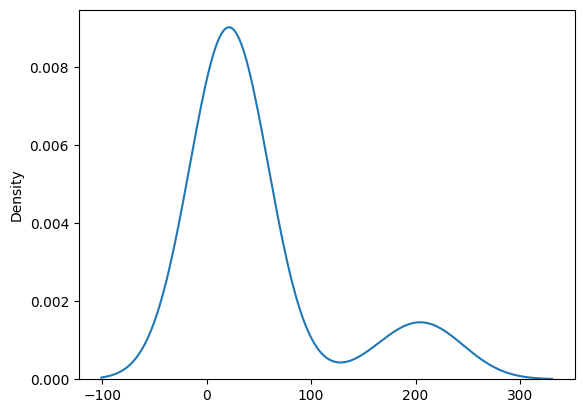

In [ ]:
sns.kdeplot(array2)

<Axes: ylabel='Density'>

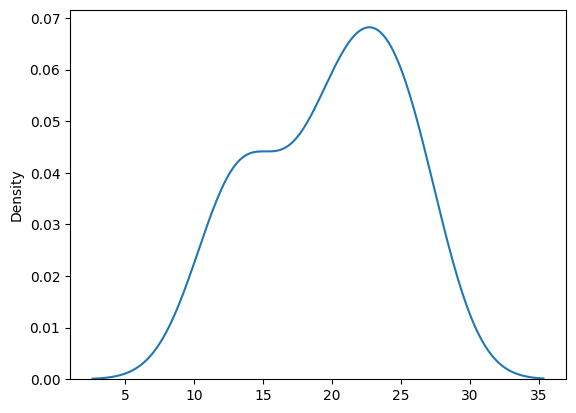

In [ ]:
sns.kdeplot(array1)

In [ ]:
# handling outliers
# z_score

In [ ]:
def detect_outliers_zscore(data,threshold):

  outlier_list =[]
  mean = np.mean(data)
  std = np.std(data)

  for x_val in data:
    z_score = (x_val-mean)/std
    z_score = np.abs(z_score)

    if z_score>threshold:
      outlier_list.append(x_val)
  return(outlier_list)

In [ ]:
detect_outliers_zscore(array1)

[]

In [ ]:
print(detect_outliers_zscore(array2,2))

[np.int64(210), np.int64(220), np.int64(180)]


In [ ]:
#handleing outliners

In [ ]:
import pandas as pd

In [ ]:
def handle_outliers_zscore(data,threshold,method="mean"):

  new_data =[]
  mean = np.mean(data)
  std = np.std(data)

  for x_val in data:
    z_score = (x_val-mean)/std
    z_score = np.abs(z_score)

    if z_score>threshold:
      if method == "mean":
        new_data.append(np.mean(data))
      elif method == "median":
        new_data.append(np.median(data))
      elif method == "mode":
        new_data.append(pd.Series(data).mode(data)[0])
    else:
        new_data.append(x_val)

  return new_data

In [ ]:
handle_outliers_zscore(array2,2,"mean")

[np.int64(10),
 np.int64(30),
 np.int64(20),
 np.int64(27),
 np.int64(28),
 np.float64(48.65),
 np.int64(25),
 np.int64(17),
 np.int64(13),
 np.int64(28),
 np.int64(16),
 np.int64(30),
 np.int64(26),
 np.float64(48.65),
 np.int64(16),
 np.int64(23),
 np.float64(48.65),
 np.int64(13),
 np.int64(14),
 np.int64(27)]

In [ ]:
handle_outliers_zscore(array2,2,"median")

[np.int64(10),
 np.int64(30),
 np.int64(20),
 np.int64(27),
 np.int64(28),
 np.float64(25.5),
 np.int64(25),
 np.int64(17),
 np.int64(13),
 np.int64(28),
 np.int64(16),
 np.int64(30),
 np.int64(26),
 np.float64(25.5),
 np.int64(16),
 np.int64(23),
 np.float64(25.5),
 np.int64(13),
 np.int64(14),
 np.int64(27)]

In [ ]:
# to handle using IQR Method

In [ ]:
# IQR Meethod
q1 =25%
q3 =75%

iqr =q3 - q1 #75% - 25%

lower_limit =q1 - 1.5*(iqr)
upper_limit = q3 + 1.5*(iqr)

In [ ]:
array2

array([ 10,  30,  20,  27,  28, 210,  25,  17,  13,  28,  16,  30,  26,
       220,  16,  23, 180,  13,  14,  27])

In [ ]:
q1 = np.percentile(array2,25)
q3 = np.percentile(array2,75)
q1,q3

(np.float64(16.0), np.float64(28.5))

In [ ]:
iqr = q3 - q1
print(iqr)

12.5


In [ ]:
lower_limit = q1- 1.5*(iqr)
print(lower_limit)

-2.75


In [ ]:
upper_limit = q3 + 1.5*(iqr)
print(upper_limit)

47.25


In [ ]:
outlier_list =[]
for x in array2:
  if x< lower_limit or x >upper_limit:
    outlier_list.append(x)
print(outlier_list)

[np.int64(210), np.int64(220), np.int64(180)]


In [ ]:
def detect_outliers_iqr(data):
  q1 = np.percentile(data,25)
  q3 = np.percentile(data,75)
  iqr = q3 - q1
  lower_limit = q1- 1.5*(iqr)
  upper_limit = q3 + 1.5*(iqr)
  outlier_list =[]
  for x in array2:
    if x< lower_limit or x >upper_limit:
      outlier_list.append(x)
  return outlier_list


In [ ]:
detect_outliers_iqr(array2)

[np.int64(210), np.int64(220), np.int64(180)]

In [ ]:
def handle_outliers_iqr(data,method):
  q1 = np.percentile(data,25)
  q3 = np.percentile(data,75)
  iqr = q3 - q1
  lower_limit = q1- 1.5*(iqr)
  upper_limit = q3 + 1.5*(iqr)
  new_data =[]
  for x in array2:
    if x< lower_limit:
      new_data.append(lower_limit if method == "capping" else np.median(data))
    elif x >upper_limit:
      new_data.append(upper_limit if method == "capping" else np.median(data))
    else:
      new_data.append(x)
  return new_data

In [ ]:
handle_outliers_iqr(array2,"capping")

[np.int64(10),
 np.int64(30),
 np.int64(20),
 np.int64(27),
 np.int64(28),
 np.float64(47.25),
 np.int64(25),
 np.int64(17),
 np.int64(13),
 np.int64(28),
 np.int64(16),
 np.int64(30),
 np.int64(26),
 np.float64(47.25),
 np.int64(16),
 np.int64(23),
 np.float64(47.25),
 np.int64(13),
 np.int64(14),
 np.int64(27)]